### Data-Analysis com Python

#### Principais bibliotecas

* Pandas
* NumPy
* SciPy
* Matplotlib
* Seaborn
* Scikit-learn -> Machine Learning

#### Tipos básicos de dados

No Pandas, existem os seguintes tipos de dados: object (string), int64 (int), float64 (float) e datatime

In [ ]:
df.dtypes #retorna o tipo de cada coluna de um dataframe - útil para verificar se a tabela vai estar organizada da maneira correta

df = pd.read_csv(<CSV_path>, header = None) 
# carrega sem header 
df = pd.read_csv(<CSV_path>, header = 0) 
# carrega usando a primeira linha como header

headers = ["coluna1", "coluna2", "coluna3"]
df.columns = headers

df1 = df.replace('?', np.NaN) #substitui os ? com NaN para poder dropar
df = df1.dropna(subset=['price'], axis=0) #dropa os valores NaN

# supondo que o df importado tenha vindo SEM nome das colunas (header), utilizar este método para adicionar uma

df.describe() # retorna um resumo estatistíco do dataframe. Fornece contagem, média, desvio padrão, intervalos mínimo, máximo e quartil para colunas numéricas

df.describe(include = "all") #para obter resumos de colunas do tipo objeto.

df.info() # fornece uma visão geral das 30 linhas superiores e inferiores do DataFrame. Retorna um resumo AINDA mais completo, incluindo o index, o dtype e o uso de memória

#### Acesso a banco de dados com Python

In [ ]:
from dmodule import connect

connection = connect('databasename', 'username', 'password')
cursor = connection.cursor()

cursor.execute('select * from mytable')
results = cursor.fetchall()

cursor.close()
connection.close()

#### Data Pre-processing em Python

 * Lidando com valores ausentes:

In [ ]:
.isnull()
.notnull()

missing_data = df.isnull() #Exibe True ou False para as 5 primeiras linhas da tabela se são ou não valores ausentes
missing_data.head(5)

dataframes.dropna() #axis = 0 para dropar a LINHA e axis = 1 para dropar a COLUNA

df.dropna(subset=["price"], axis = 0, inplace = True) #inplace permite que a alteração seja feita no df

dataframe.replace(missing_value, new_value) # substituir valores ausentes

mean = df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan, mean)

* Formatação de dados:

In [ ]:
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city_mpg": "city-L/100km"}, inplace=True)

dataframe.astype() #para converter data type

df['price'] = df['price'].astype("int")

* Normalização de dados:

A normalização de dados é essencial para fazer comparações válidas entre variáveis. Se uma variável é muitas vezes maior que a outra (ou seja, escalas diferentes), pode ser difícil usar modelos de regressão, por exemplo. Com isso em mente, utiliza-se da normalização de dados para que fiquem em "escalas" próximas.

1.  Simple Feature scaling
2.  Min-Max
3. Z-score ou Standard Score (pontuação padrão)

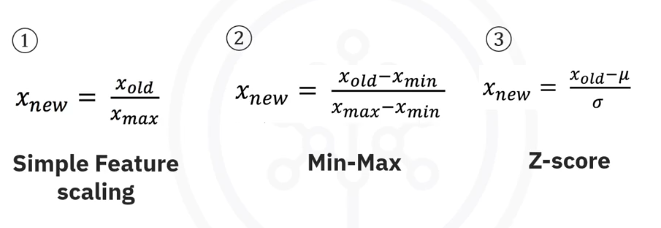

In [ ]:
df["length"] = df["length"]/df["length"].max() # simple feature scaling

df["length"] = (df["length"]- df["length"].min())/(df["length"].max() - df["length"].min()) # min-max

df["length"] = (df["length"]- df["length"].mean())/df["length"].std() # Z-score

* Binning

Agrupando valores em "bins". Converte numeric em categoric variables

Ex: coluna preço varia de 5000 à 45.500. Para facilitar na hora de trabalhar, podemos converter os valores em low, mid e high.

In [ ]:
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df['price'], bins, labels=group_names, include_lowest = True)

Visualizando a distribuição de cada bin:

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

* Transformando variáveis categóricas em variáveis quantitativas em Python

Problema: A maioria dos modelos estatistícos não aceitam objects/strings como input

Solução: Adicionar dummy variables para cada categoria e associar 0 ou 1 para cada categoria - One Hot Encoding

In [ ]:
pd.get_dummies(df['fuel'])

#### Análise Exploratória de Dados

In [ ]:
df.value_counts()

import seaborn as sns

from matplotlib import pyplot as plt

sns.boxplot(x = "x", y = "y", data = df)

# em scatter plots, o y é a o alvo e o x é o predictor

plt.scatter(x, y)
plt.title()
plt.xlabel
plt.ylabel

`groupby()` e `Pivot()` em Python:

In [ ]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')


Correlação de dados:

Coeficiente de correlação:

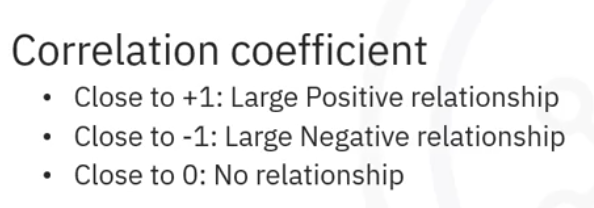

P-Value:

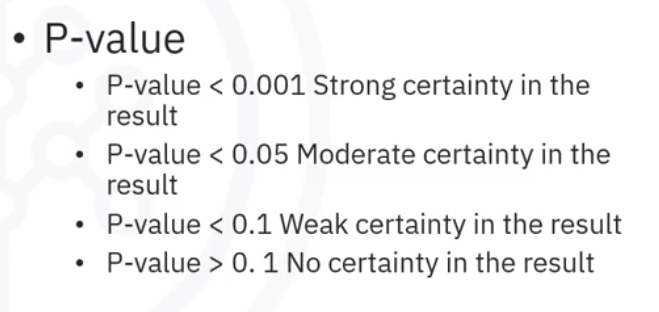

In [ ]:
import scipy

pearson_coef, p_value = stats.pearson(df['horsepower'], df='price')

#### Desenvolvimento de Modelos de Machine Learning

1. Modelo de Regressão Linear Simples

In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

X = df[['highway-mpg']]
Y = df['price']

lm.fit(X, Y) #treina o modelo com os dados dos parâmetros

Yhat = lm.predict(X) #yhat é o y da função

lm.intercept_ #coeficiente linear do modelo
lm.coef_ #coeficiente angular do modelo

2. Modelo de Regressão Linear Múltiplo

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price']) #treina o modelo com os dados dos parâmetros

Yhat = lm.predict(X)

3. Modelo de Regressão Polinomial

Serve para descrever relações curvilíneas (funções polinomiais).
Ex: Calcular um polinomio de 3a ordem

In [ ]:
import numpy as np

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

Regressão Polinomial com mais de uma dimensão

A transformação polinomial (polynomial transform), ou mais especificamente a criação de atributos polinomiais (polynomial features), é uma técnica de engenharia de atributos em ciência de dados usada para permitir que modelos lineares capturem relacionamentos não lineares nos dados.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly = pr.fit_transform(x[['horsepower', 'curb-weight']])

Pre-processing -> Normalizando cada variável

In [ ]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(x_data, [['horsepower', 'highway-mpg']])
x_scale = SCALE.transform(x_data[['horsepower', 'highway-mpg']])

Pipelines

São sequências de etapas interligadas que processam informações, dividindo uma tarefa maior em estágios menores e gerenciáveis para automatizar e otimizar fluxos de trabalho

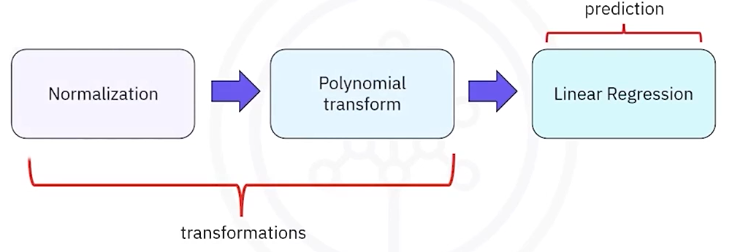

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input = [('polynomial', PolynomialFeatures(degree=2)), ('scale', StandardScaler()), ('Model', LinearRegression())]

Pipe = Pipeline(Input)

Pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)

yhat = Pipe.predict(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

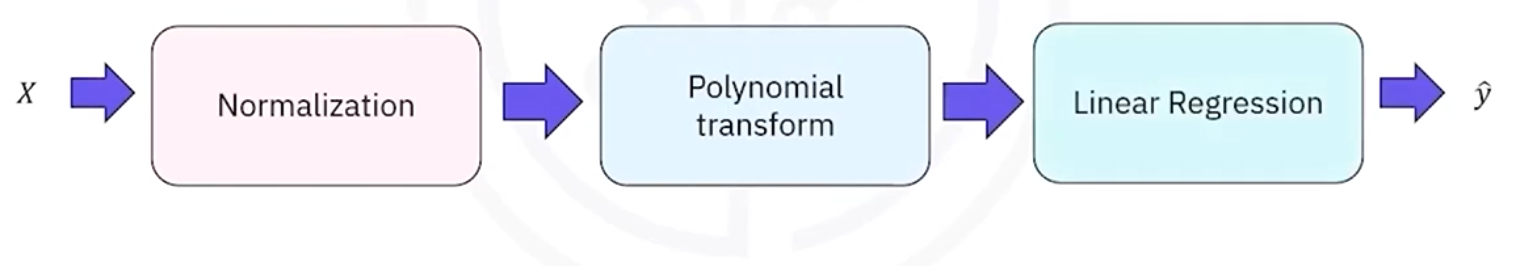

Medidas para avaliação na amostra

1. MSE - Mean Squared Error (Erro Médio Quadrático)

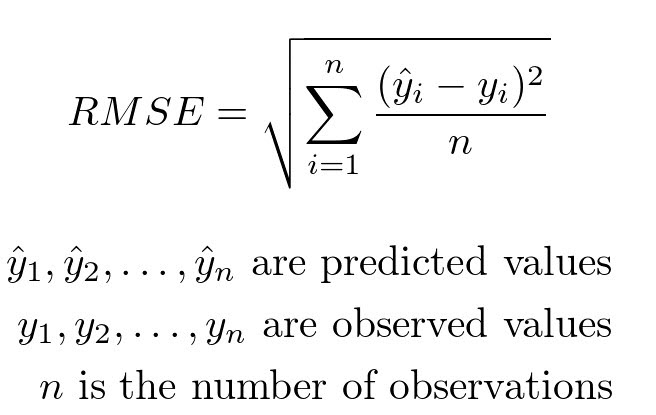

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], Y_predict_simple_fit)

2. R-Squared ou Coeficiente de Determinação

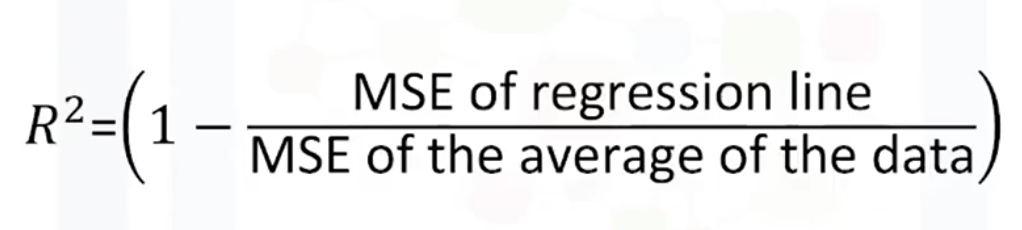



In [ ]:
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X, Y)
lm.score(X, Y)

Avaliação do Modelo

Training/Testing Sets

Dividr o dataset em 70% Training e 30% Testing. Construir e treinar o modelo com Training Set e testar o modelo com Testing Set. Quando terminar de testar o modelo, usamos TODOS os nossos dados para treinar o modelo e obter a melhor performance.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=0) 

# test_size é a porcentagem de dados que será usada para testing
# random_state é um gerador de número usado para "random sampling"

Cross-Validation

É uma técnica de Machine Learning para avaliar a capacidade de um modelo prever dados novos, dividindo o conjunto de dados em subconjuntos (treino e teste) repetidamente, treinando o modelo nos subconjuntos de treino e testando-o nos de teste, o que ajuda a detectar sobreajuste (overfitting) e a garantir que o modelo generalize bem para dados não vistos, usando métodos como K-Fold

1. Divisão: O conjunto de dados original é dividido aleatoriamente em 'k' partes (folds) de tamanho igual. 
2. Iteração: O processo se repete 'k' vezes (iterações). 
3. Treino/Teste: Em cada iteração, um dos 'k' folds é usado como conjunto de teste, enquanto os outros 'k-1' folds são usados para treinar o modelo. 
4. Avaliação: A performance do modelo é calculada em cada iteração (ex: acurácia, erro). 
5. Resultado Final: A média de todas as iterações fornece uma estimativa mais robusta do desempenho do modelo, identificando seu verdadeiro valor preditivo. 

Evita o Overfitting:
* Se um modelo for treinado e testado nos mesmos dados, ele pode "decorar" os dados de treino e ter um desempenho ruim em dados reais (novos). 
* Generalização: Garante que o modelo funcione bem em dados que ele nunca viu antes, pois é avaliado em diferentes partições dos dados. 
* Robustez: Fornece uma avaliação mais confiável da performance do modelo em comparação com uma única divisão treino/teste (método Holdout). 



Função `cross_val_score()`

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr, x_data, y_data, cv=3) # tipo de modelo e dados para cada variável. cv=k representa as k partições

# retorna um array de scores (coeficiente de determinação), um pra cada partição. Podemos calcular a média para estimar o R² médio

np.mean(scores)

Função `cross_val_predict()`

In [ ]:
from sklearn.model_selection import cross_val_predict
import numpy as np

yhat = cross_val_predict(lr2e, x_data, y_data, cv=3)

Overfitting (sobreajuste), Underfitting (subajuste) e seleção de modelos

* Overfitting -> Função de regressão muito complexa para o modelo real. Ele funciona bem para o barulho mas não para o modelo real

* Underfitting -> Função de regressão muito simples para o modelo real (ex: usar um modelo de regresão linear para prever um comportamento polinomial de grau 10)

Para evitar estes erros, usamos uma seleção de modelos que minimize o RME e maximize o Coeficiente de Determinação.

In [ ]:
Rsqu_test = []
order = [1, 2, 3, 4]

for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_train[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

Regressão Ridge

É uma técnica estatistíca de regularização para tratar erros de overfitting e multicolinearidade em modelos de regressão. Ela encolhe os coeficientes em direção a zero introduzindo um valor Alpha, diminuindo sua magnitude e sem eliminá-los completamente, resultando em um modelo mais estável e com menos variância. Útil quando há muitas variáveis ou quando os preditores são altamente correlacionados. 

Para escolher o valor de alpha, usamos cross-validation para encontrar o valor de alpha que possui o maior valor de R² correspondente.

In [ ]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X, y)
Yhat = RidgeModel.predict(X)

Grid Search

Hiperparâmetros são configurações externas a um modelo de machine learning que devem ser definidas pelo usuário antes do processo de treinamento. Ex: Alpha da Regressão Ridge
Grid Search é uma ferramenta do Scikit-lean que automaticamente calcula o RME ou R² para diferentes valores de hiperparâmetros e determina qual parâmetro retorna um melhor modelo preditivo.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha': [0.001, 0.1, 10, 100, 1000, 10000, 100000, 1000000], 'normalize': [True, False]}]

RR = Ridge()

Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']

for param, mean_val, mean_test in zip(scores['params'], scores['mean_test_score'], scores['mean_train_score']):
    print(param, 'R² on test data:', mean_val, 'R² on train data:', mean_test)